# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Marbella, Malaga, Spain**, or **Spain** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Marbella, Malaga, Spain** to Ann Arbor, USA. In that case at least one source file must be about **Marbella, Malaga, Spain**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Marbella, Malaga, Spain** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.widgets import Button
%matplotlib notebook

In [9]:
# Load the dataframe with the population for each Country and select only data relative to 2010.
# Source: http://www.pewforum.org/2015/04/02/religious-projection-table/2010/percent/all/ 

pop = pd.read_excel('/Users/andrea/Desktop/Religious Composition.xlsx', sheetname=0, skiprows=[1, 2, 3, 4, 5, 6, 7],
                    usecols=['Year', 'Country', 'All Religions']).set_index('Country')
pop = pop[pop['Year'] == 2010].drop('Year', axis=1)
pop['All Religions'] = pop['All Religions'].str.replace(',', '').str.replace(' ', '')
pop = pop[pop['All Religions'] != '<10000']
pop['All Religions'] = pd.to_numeric(pop['All Religions'])
pop.rename(columns={'All Religions': 'Population'}, inplace=True)

# Remove all Countries with less than 2M people
pop = pop[pop['Population'] > 2e6]
pop.index.name = None

pop.head()

,Population
Afghanistan,31410000
Albania,3200000
Algeria,35470000
Angola,19080000
Argentina,40410000


In [10]:
# Load the dataframe with the religious composition for each Country and select only data relative to 2010.
# Final dataframe contains the % of affiliated to any religion.
# Source: http://www.pewforum.org/2015/04/02/religious-projection-table/2010/percent/all/

rc = pd.read_excel('/Users/andrea/Desktop/Religious Composition.xlsx', sheetname=1, skiprows=[1, 2, 3, 4, 5, 6, 7],
                   usecols=['Year', 'Country', 'Unaffiliated']).set_index('Country')
rc = rc[rc['Year'] == 2010].drop('Year', axis=1)
rc = rc[rc['Unaffiliated'] != '< 1.0']
rc['Unaffiliated'] = 100 - pd.to_numeric(rc['Unaffiliated'])
rc = rc.rename(columns={'Unaffiliated': 'Affiliated'})
rc.index.name = None

rc.head()

,Affiliated
Albania,98.6
Algeria,98.2
Andorra,91.2
Angola,94.9
Anguilla,96.0


In [11]:
# Load the dataframe with the Human Rights Protection Score for each Country and select only data relative to 2010.
# Source: https://ourworldindata.org/human-rights

hrp = pd.read_csv('/Users/andrea/Desktop/Human Rights Protection.csv')
hrp = hrp[hrp['Year'] == 2010].drop(['Code', 'Year'], axis=1).rename(
    columns={'Human Rights Protection Scores – by Christopher Farris and Keith Schnakenberg': 'HRP Score'}).set_index(
    'Entity')
hrp.index.name = None

hrp.head()

,HRP Score
Afghanistan,-1.377690
Albania,0.482560
Algeria,-0.306423
Andorra,3.250100
Angola,-0.685063


In [12]:
# Load the dataframe with the Press Freedom Score for each Country and select only data relative to 2010.
# Source: https://freedomhouse.org/report-types/freedom-press

pf = pd.read_excel('/Users/andrea/Desktop/Press Freedom.xlsx', sheetname=1, header=3)
year2010 = pf.columns.get_loc(2010)
pf = (pd.read_excel('Press Freedom.xlsx', sheetname=1, header=3, usecols=[0, year2010 + 3]).drop(0)
      .set_index('Year(s) Covered')).rename(columns={'Unnamed: 150': 'PF Score'})
pf = pf[pf['PF Score'] != '-']
pf['PF Score'] = (100 - pd.to_numeric(pf['PF Score'])) / 100
pf.index.name = None

pf.head()

,PF Score
Afghanistan,0.25
Albania,0.50
Algeria,0.38
Andorra,0.87
Angola,0.36


In [13]:
# Load the dataframe with the Regime present in each Country and select only data relative to 2008, the most recent.
# Source: https://xmarquez.github.io/democracyData/reference/pacl.html
# The final dataframe contains all the Countries that were democracies in 2008.

# dmc = pd.read_excel('Regimes.xls', sheetname=0, usecols=['ctryname', 'year', 'regime'])
# dmc = (dmc[(dmc['year'] == 2008) & ((dmc['regime'] < 3) | (dmc['ctryname'] == 'North Korea'))]
#        .drop('year', axis=1).set_index('ctryname'))
# dmc.index.name = None

# dmc.head()

In [14]:
# Merge all the dataframes and normalize the scores between 0 and 1.

df1 = pd.merge(pop, rc, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df1, hrp, how='inner', left_index=True, right_index=True)
df3 = pd.merge(df2, pf, how='inner', left_index=True, right_index=True)

df3['HRP Score'] = (df3['HRP Score'] - df3['HRP Score'].min()) / (df3['HRP Score'].max() - df3['HRP Score'].min())
df3['PF Score'] = (df3['PF Score'] - df3['PF Score'].min()) / (df3['PF Score'].max() - df3['PF Score'].min())


# Finally group by % of affiliated and average the scores.
df4 = df3.groupby(by=(df3['Affiliated']/10).round() * 10).mean()
df4.index.name = 'Affiliated(%)'

df4

,Population,Affiliated,HRP Score,PF Score
Affiliated(%),,,,
20.0,1.049000e+07,23.600000,0.772395,0.896552
30.0,2.435000e+07,28.700000,0.059545,0.000000
40.0,1.265400e+08,43.000000,0.672611,0.873563
50.0,6.947450e+08,50.700000,0.331730,0.442529
60.0,5.872000e+06,60.180000,0.696629,0.841379
70.0,4.039500e+07,71.666667,0.572803,0.653257
80.0,4.716867e+07,80.273333,0.563673,0.718008
90.0,2.388677e+07,90.629032,0.476882,0.640341
100.0,1.872452e+07,97.412903,0.373382,0.475714


In [23]:
# Define the funcion to plot the Human Rights Protection and Press Freedom Scores

start_msg = ("""Countries are grouped according to the % of their affiliated to any religion.
Each point represents the mean HRP and PF per group.\n
SPAIN, the region selected for my assignment, is inside the 80% group.\n
The plot shows the possible connection between religion and
living conditions/freedom of expression.\n
Data points at 30% and 50% (North Korea and China, respectively) highlight
the restrictions of a dictatorship, indipendently from religion.\n
Click on the data and interact with the plot for details.""")

def plot():
    plt.plot(range(20, 101, 10), df4['HRP Score'], zorder=1, color='r', marker='o', markersize=10,
             label='Human Right Protection (HRP)', picker=5)
    plt.plot(range(20, 101, 10), df4['PF Score'], zorder=2, color='b', marker='o', markersize=10,
             label='Press Freedom (PF)', picker=5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend(bbox_to_anchor=(1,0.96))
    plt.xlabel('% of Population Affiliated to Any Religion', fontsize=13)
    plt.ylabel('Score', fontsize=13)
    plt.title('Religion and Human Rights/Press Freedom Worldwide', fontsize=17)
    plt.annotate(start_msg, xy=(38, 0.3), verticalalignment='top', fontsize=10, linespacing=1.15,
                 fontstyle='italic')

<IPython.core.display.Javascript object>


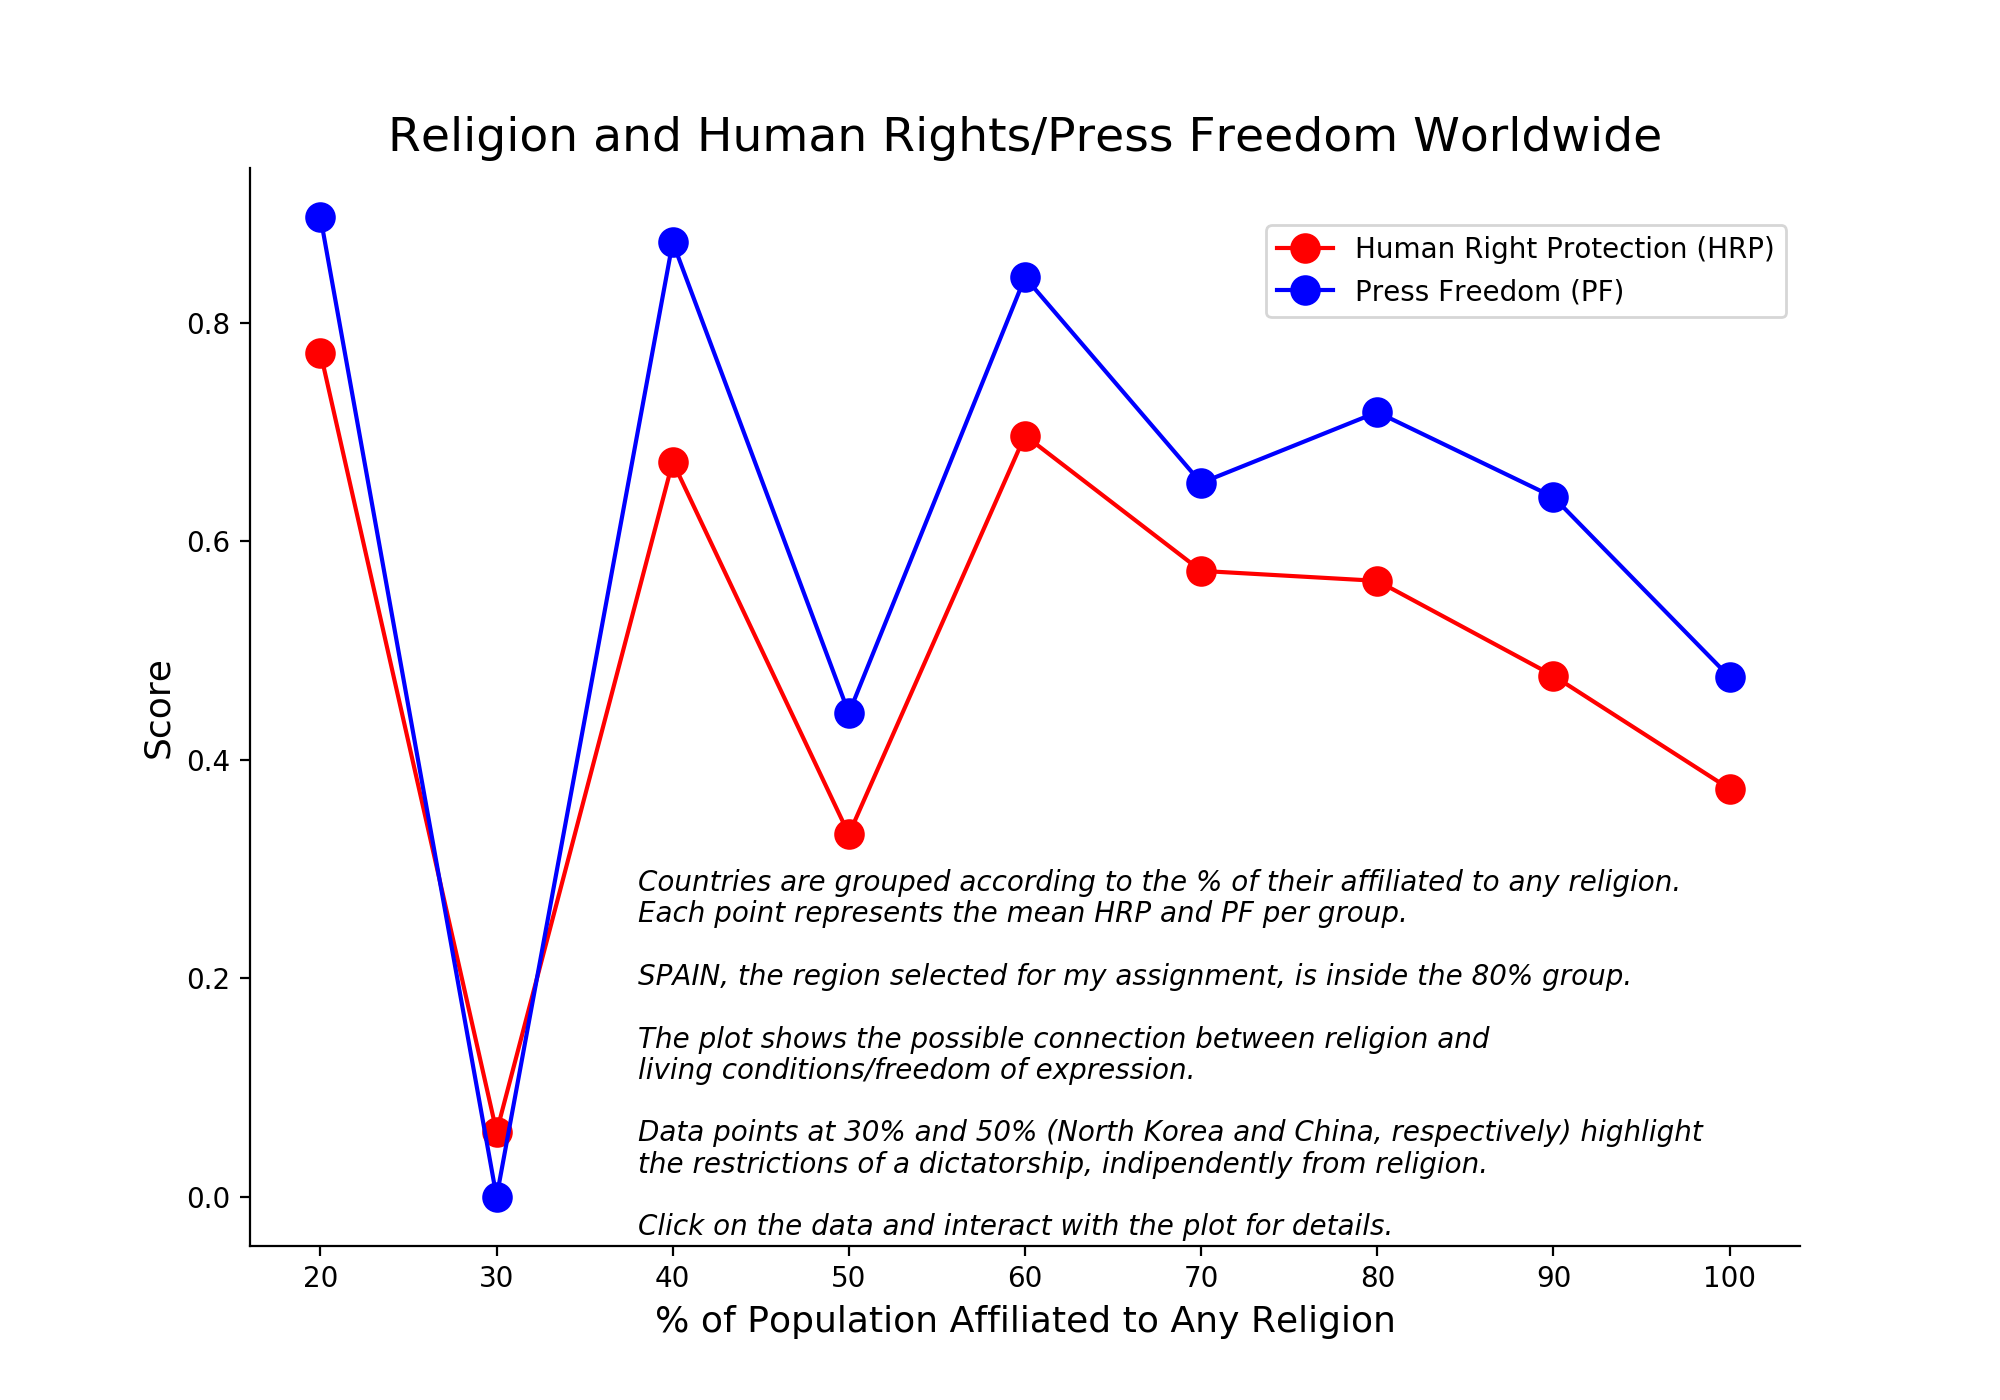

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Position of the 4 buttons
b_ax = [plt.axes([0.32, 0.28, 0.1, 0.03]), plt.axes([0.32, 0.24, 0.1, 0.03]),
        plt.axes([0.32, 0.2, 0.1, 0.03]), plt.axes([0.34, 0.15, 0.06, 0.03])]

b_aff = Button(b_ax[0], 'Affiliated', color='#71da71')
b_hrp = Button(b_ax[1], 'HRP', color='#99ccff')
b_pf = Button(b_ax[2], 'PF', color='#99ccff')
b_rs = Button(b_ax[3], 'Reset', color='#ff6666')

# Used to color the buttons during interaction
b_dict = {'Affiliated': b_aff, 'HRP Score': b_hrp, 'PF Score': b_pf}

# Make buttons invisible at first
for j in b_ax:
    j.set_visible(False)
    
# Used to handle the annotation inside onclick
last_value_picked = 0

def color_green(string):
    for b in b_dict:
        if b == string:
            b_dict[b].color = '#71da71'
        else:
            b_dict[b].color = '#99ccff'

def message(value, string):

    """Create the message to show in the annotation after removing last annotation, if present."""

    try:
        [y for y in ax.get_children() if isinstance(y, matplotlib.text.Annotation)][0].remove()
    except IndexError:
        pass

    if string == 'Affiliated':
        msg = 'Countries included in the {}% group: {}\n\n'.format(value, 'Affiliated (%)')
    else:
        msg = 'Countries included in the {}% group: {}\n\n'.format(value, string)

    df3.sort_values('{}'.format(string), ascending=False, inplace=True)

    for i, g in df3.groupby(by=(df3['Affiliated']/10).round() * 10):
        if i == value:
            for j, n in enumerate(g.index):
                if n == 'Spain':
                    n = n.upper()
                if (j + 1) % 3:
                    msg += '{} ({}), '.format(n, round(df3.loc[n.title(), '{}'.format(string)], 2))
                else:
                    msg += '{} ({}),\n'.format(n, round(df3.loc[n.title(), '{}'.format(string)], 2))
            break

    return msg[:-2]

def onpick(event):

    global b_ax
    global last_value_picked

    plt.cla()
    plot()
    a = event.artist
    i = event.ind
    x = a.get_xdata()[i]
    
    if len(x) > 1:
        x = x[1:]
    
    last_value_picked = x[0]

    msg = message(x[0], 'Affiliated')
    plt.annotate(msg, xy=(53, 0.4), verticalalignment='top', fontsize=10, linespacing=1.45)

    # Make all buttons visible
    for j in fig.get_axes()[1:]:
        j.set_visible(True)
    color_green('Affiliated')


def onclick(event, string):

    color_green(string)
    plt.axes(ax)
    msg = message(last_value_picked, string)
    plt.annotate(msg, xy=(53, 0.4), verticalalignment='top', fontsize=10, linespacing=1.45)

def reset(event):

    for j in b_ax:
        j.set_visible(False)

    plt.axes(ax)
    plt.cla()
    plot()

plt.gcf().canvas.mpl_connect('pick_event', onpick)

plt.axes(ax)
plot()

b_aff.on_clicked(lambda event: onclick(event, 'Affiliated'))
b_hrp.on_clicked(lambda event: onclick(event, 'HRP Score'))
b_pf.on_clicked(lambda event: onclick(event, 'PF Score'))
_ = b_rs.on_clicked(reset)